# 2. Practical Part

## 1. Ridge Regression

In [59]:
import numpy as np
import random
%matplotlib inline
import matplotlib.pyplot as plt

In [74]:
def regression_gradient(weightedDecay, stepSize, numberSteps, data):
    '''
    weightedDecay: λ
    stepSize: η
    x: data
    t: target
    
    '''
    
    """initialize theta = [weight, bias] randomly.
        n = step size.
        lambda = regularization hyperparemeter.
        data = training dataset, composed of points of format (x, t).
        until gradient sufficiently approaches 0:
            gradient = 0
            for datapoint (x,t) in data: # This is batch gradient descent
                pdv_w = (2*x)*(w^T*x + b - t) + 2*lambda*w
                pdv_b = 2*(w^T*x + b - t)
                gradient = gradient + [pdv_w, pdv_b]    # Sum, not mean, see Problem 1
            theta = theta - n*gradient"""
    
    # Get dimension of data - somewhat hacky for 1-dimensional data
    try:
        d = len(data[0,0])
    except:
        d = 1
    
    # Initialize theta = [weight, bias] randomly.
    weight = np.random.rand(d, 1) 
    bias = random.random()
    theta = [weight, bias]
    theta = np.array(theta)
    
    gradient = []
    for i in range(0, numberSteps):
        for datapoint in data: # Batch descent
            print("datapoint:", datapoint)
            w, b = theta[0], theta[1]
            #print("w, b:", w, b)
            x, t = datapoint[0], datapoint[1]
            # Get partials (just the number, not in array form)
            pdv_w = ((2*x)*(np.dot(w.T, x) + b - t) + (np.dot(2*weightedDecay, w)))[0,0]
            pdv_b = (2*(np.dot(w.T, x) + b - t))[0,0]
            pdvs = np.array([pdv_w, pdv_b])
            print("pdvs:", pdvs)
            # If on first iteration, let this be the gradient
            if i == 0:
                gradient = pdvs
            else: # Otherwise, alter the existing gradient
                gradient += pdvs
        gradient = gradient/len(data)
        theta = theta - (stepSize*gradient)
        print("theta:", theta)
    
    return theta
            
        
        
    """#gradient of a scalar x
        grad = np.inverse(np.dot(data.T , data)) *data*(bias-target) 
        #regularization lambda
        regGrad = weightedDecay * np.dot(data.T, data)
        
        regGrad = regGrad + grad
        weight = weight - stepSize*regGrad
    return w"""


     

## 2. Draw Dn from h(x)

In [75]:
x = np.sort(np.random.uniform(-5,5,15))
hX = np.sort(np.sin(x) + 0.3*x -1)
dataDn = [x, hX]
print(dataDn)


[array([-4.49314897, -3.97725538, -3.59207821, -3.00610734, -1.92891686,
       -1.8756112 , -0.30890109, -0.28078104, -0.22796267,  0.46468402,
        0.79563817,  0.98202335,  1.54519605,  4.22937396,  4.35582471]), array([-2.51658589, -2.51523232, -2.03690339, -1.64222076, -1.45143546,
       -1.39668224, -1.37188167, -1.36134049, -1.29438217, -0.6303542 ,
       -0.61678643, -0.41245444, -0.04699819,  0.12622973,  0.46323115])]


## 3.

datapoint: [-4.49314897 -2.51658589]
pdvs: [-9.92532452  2.20899075]
datapoint: [-3.97725538 -2.51523232]
pdvs: [-10.9448996    2.75187247]
datapoint: [-3.59207821 -2.03690339]
pdvs: [-7.9117783   2.20256293]
datapoint: [-3.00610734 -1.64222076]
pdvs: [-6.11110817  2.03289752]
datapoint: [-1.92891686 -1.45143546]
pdvs: [-5.38268379  2.79052141]
datapoint: [-1.8756112  -1.39668224]
pdvs: [-5.1342774   2.73738896]
datapoint: [-0.30890109 -1.37188167]
pdvs: [-1.34207609  4.34467911]
datapoint: [-0.28078104 -1.36134049]
pdvs: [-1.22233403  4.35333542]
datapoint: [-0.22796267 -1.29438217]
pdvs: [-0.97460365  4.27527742]
datapoint: [ 0.46468402 -0.6303542 ]
pdvs: [1.70991524 3.67973751]
datapoint: [ 0.79563817 -0.61678643]
pdvs: [3.1846262  4.00260612]
datapoint: [ 0.98202335 -0.41245444]
pdvs: [3.72290534 3.79105581]
datapoint: [ 1.54519605 -0.04699819]
pdvs: [5.64882376 3.65573272]
datapoint: [4.22937396 0.12622973]
pdvs: [26.00201508  6.14795838]
datapoint: [4.35582471 0.46323115]
pdvs: [

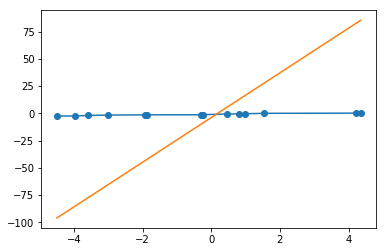

In [76]:
# Get data into (x,t) format
dataDn_formatted = []
for i, datapoint in enumerate(dataDn[0]):
    new_datapoint = [dataDn[0][i], dataDn[1][i]]
    dataDn_formatted.append(new_datapoint)
dataDn_formatted = np.array(dataDn_formatted)

# With lambda = 0
weightedDecay = 0
stepSize = 1
numberSteps = 2
theta = regression_gradient(weightedDecay, stepSize, numberSteps, dataDn_formatted)
w, b = theta[0][0], theta[1]
func_1 = (w*x) + b
print(x)
print(func_1)

# Plot
# The points from the training set Dn:
plt.scatter(dataDn[0], dataDn[1])
# The sin function:
plt.plot(dataDn[0], dataDn[1])
# The learned function:
plt.plot(x, func_1)

plt.show()